In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import json
from sklearn.manifold import TSNE
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/uma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("All_Diets_cleaned.csv")
df = df.drop_duplicates()

In [4]:
df

,Recipe_name,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,Diet_type_dash,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,...,Cuisine_type_italian,Cuisine_type_japanese,Cuisine_type_kosher,Cuisine_type_mediterranean,Cuisine_type_mexican,Cuisine_type_middle eastern,Cuisine_type_nordic,Cuisine_type_south american,Cuisine_type_south east asian,Cuisine_type_world
0,bone broth from nom nom,5.22,1.29,3.20,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,effect asian glazed pork side sweet crispy app...,181.55,28.62,146.14,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,pumpkin pie,30.91,302.59,96.76,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,strawberry guacamole,9.62,75.78,59.89,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,asian cauliflower fried rice from nom nom,39.84,54.08,71.55,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,brown butter sunchoke soup with brussels sprou...,85.20,288.14,137.15,2022-10-16,20:40:44,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7800,salad,141.98,123.18,323.50,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7801,luis bu uel dry martini,0.01,0.39,0.00,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7802,cornflake semi fried chicken tender,155.38,239.88,260.84,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.head(10)

,Recipe_name,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,Diet_type_dash,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,...,Cuisine_type_italian,Cuisine_type_japanese,Cuisine_type_kosher,Cuisine_type_mediterranean,Cuisine_type_mexican,Cuisine_type_middle eastern,Cuisine_type_nordic,Cuisine_type_south american,Cuisine_type_south east asian,Cuisine_type_world
0,bone broth from nom nom,5.22,1.29,3.20,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,effect asian glazed pork side sweet crispy app...,181.55,28.62,146.14,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,pumpkin pie,30.91,302.59,96.76,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,strawberry guacamole,9.62,75.78,59.89,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,asian cauliflower fried rice from nom nom,39.84,54.08,71.55,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,shrimp stuffed mushroom,68.62,34.15,42.44,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
6,pumpkin pie,30.03,275.88,97.68,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,autoimmune pesto,4.25,14.15,72.90,2022-10-16,17:20:09,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
8,baked banana chip encrusted french toast,152.88,1874.52,385.80,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,vietnamese pho pressure cooker noodle soup,602.91,274.87,400.01,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [6]:
recipes = df["Recipe_name"]
embedding_size = 150
tokenized_recipes = [word_tokenize(sentence) for sentence in recipes]
model = Word2Vec(sentences=tokenized_recipes, vector_size=embedding_size, window=5, min_count=1, workers=4,epochs=15)


In [7]:
with open("tagged_diets.json","r") as file:
    tags_dictionary = json.load(file)

tags_dictionary[:10]

[{'nouns': ['bone', 'broth', 'nom'], 'adjectives': ['nom']},
 {'nouns': ['effect', 'pork', 'side', 'crispy', 'appetizer'],
  'adjectives': ['asian', 'sweet']},
 {'nouns': ['pumpkin', 'pie'], 'adjectives': []},
 {'nouns': ['strawberry', 'guacamole'], 'adjectives': []},
 {'nouns': ['cauliflower', 'rice', 'nom'], 'adjectives': ['asian', 'nom']},
 {'nouns': ['shrimp', 'mushroom'], 'adjectives': []},
 {'nouns': ['pumpkin', 'pie'], 'adjectives': []},
 {'nouns': ['autoimmune', 'pesto'], 'adjectives': []},
 {'nouns': ['banana', 'chip', 'toast'], 'adjectives': ['french']},
 {'nouns': ['pho', 'pressure', 'cooker', 'soup'],
  'adjectives': ['vietnamese', 'noodle']}]

In [8]:
model_vocab = set(model.wv.index_to_key)

nouns_features_list = []
adjectives_features_list = []
all_nouns = []
for index,tags in enumerate(tags_dictionary):
    nouns = tags["nouns"]
    all_nouns.append(nouns)
    adjectives = tags["adjectives"]
    if adjectives == []:
        adjectives_features = [0 for _ in range(embedding_size)]
    else:
        allowed_adjectives = [adjective for adjective in adjectives if adjective in model_vocab]
        if allowed_adjectives == []:
            adjectives_features = [0 for _ in range(embedding_size)]
        else:
            adjectives_features = np.mean([model.wv[adj] for adj in allowed_adjectives],axis=0)
    if nouns == []:
            allowed_words = [word for word in recipes.iloc[index].split() if word in model_vocab]
            nouns_features = np.mean([model.wv[word] for word in allowed_words],axis=0)
    else:
        allowed_nouns = [noun for noun in recipes.iloc[index].split() if noun in model_vocab]
        if allowed_nouns==[]:
            allowed_words = [word for word in recipes.iloc[index].split() if word in model_vocab]
            nouns_features = np.mean([model.wv[word] for word in allowed_words],axis=0)
        else:
            nouns_features = np.mean([model.wv[noun] for noun in allowed_nouns],axis=0)
    nouns_features_list.append(nouns_features)
    adjectives_features_list.append(adjectives_features)
    

In [9]:
nouns_features_list = np.array(nouns_features_list)
adjectives_features_list = np.array(adjectives_features_list)

In [10]:
embeddings_features = nouns_features_list + adjectives_features_list
embeddings_features.shape

(7795, 150)

In [11]:
tsne = TSNE(n_components=3, random_state=0,verbose=1,n_iter=1500)
X_embedded = tsne.fit_transform(embeddings_features)

/home/uma/miniconda3/envs/language_processing/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7795 samples in 0.001s...
[t-SNE] Computed neighbors for 7795 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7795
[t-SNE] Computed conditional probabilities for sample 2000 / 7795
[t-SNE] Computed conditional probabilities for sample 3000 / 7795
[t-SNE] Computed conditional probabilities for sample 4000 / 7795
[t-SNE] Computed conditional probabilities for sample 5000 / 7795
[t-SNE] Computed conditional probabilities for sample 6000 / 7795
[t-SNE] Computed conditional probabilities for sample 7000 / 7795
[t-SNE] Computed conditional probabilities for sample 7795 / 7795
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.161354
[t-SNE] KL divergence after 1500 iterations: 0.810126


In [12]:
types = df.iloc[:,6:11]
types.to_numpy(dtype=int)
column_names = df.columns[6:11]
colors = ['red', 'blue', 'green', 'orange','magenta']
color_indices = np.argmax(types, axis=1)
point_colors = [colors[idx] for idx in color_indices]
markers = ['p','s','o','x','D']
angles =[0,45,90,135]
selected_indices = []
for i in range(len(colors)):
    indices = np.where(color_indices == i)[0]
    selected_indices.append(np.random.choice(indices, size=25, replace=False))
selected_indices = np.array(selected_indices)

/tmp/ipykernel_24678/1920935302.py:9: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_embedded[class_indices, 0], X_embedded[class_indices, 1], X_embedded[class_indices, 2],


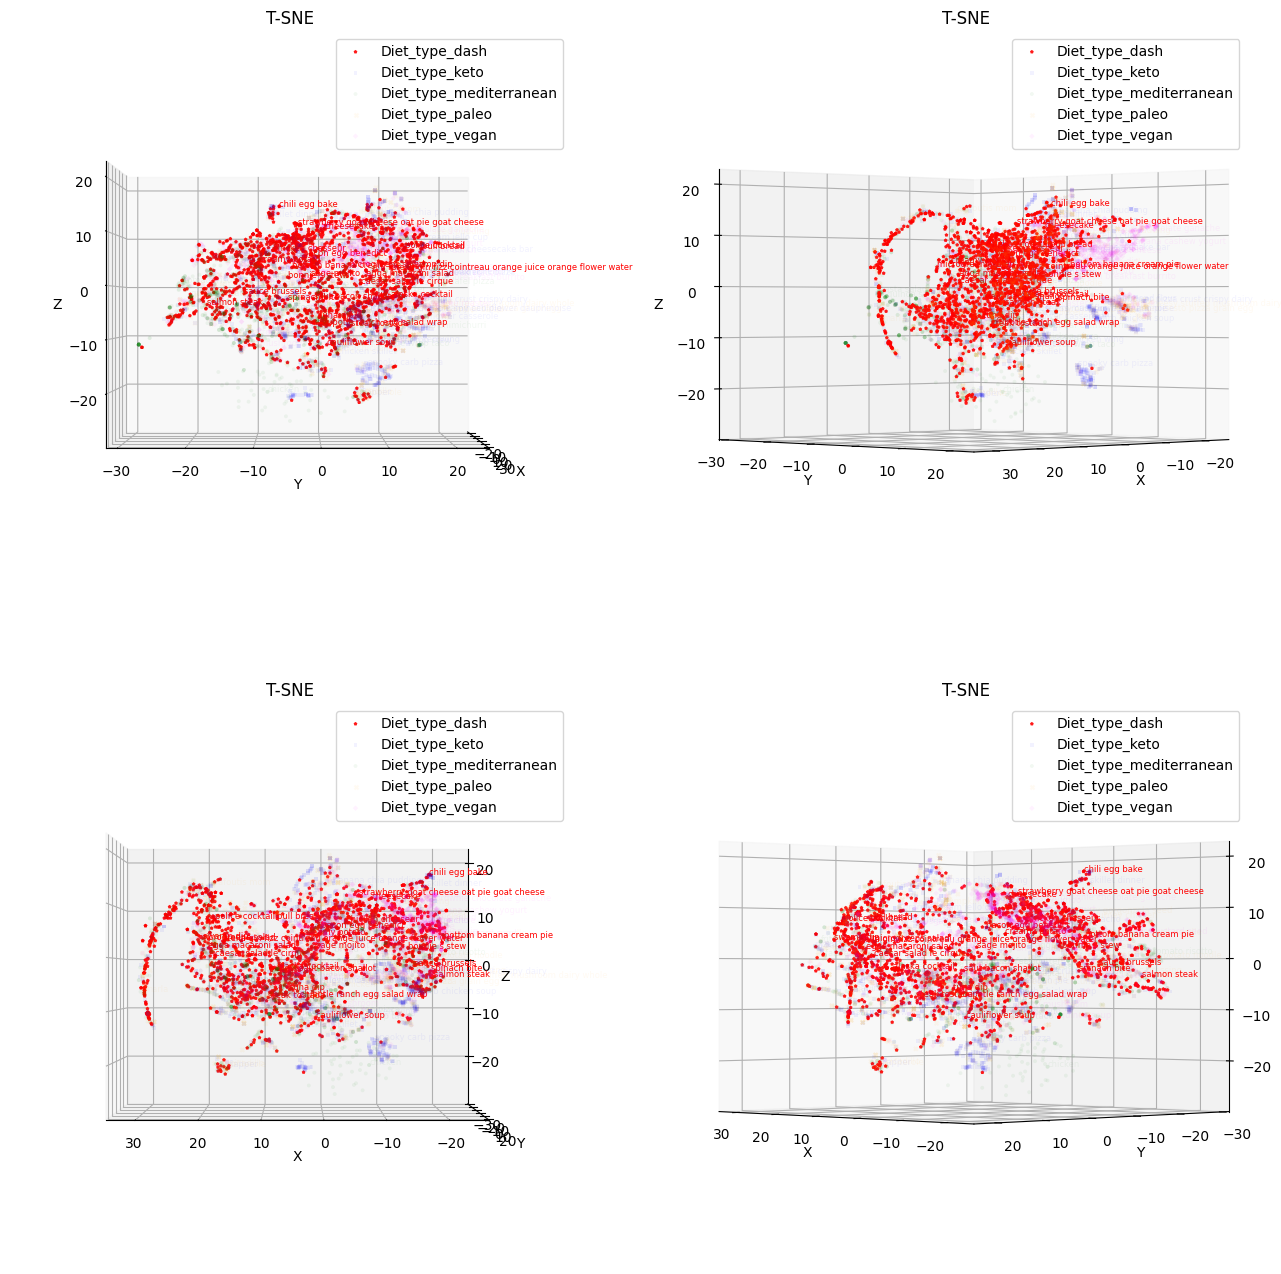

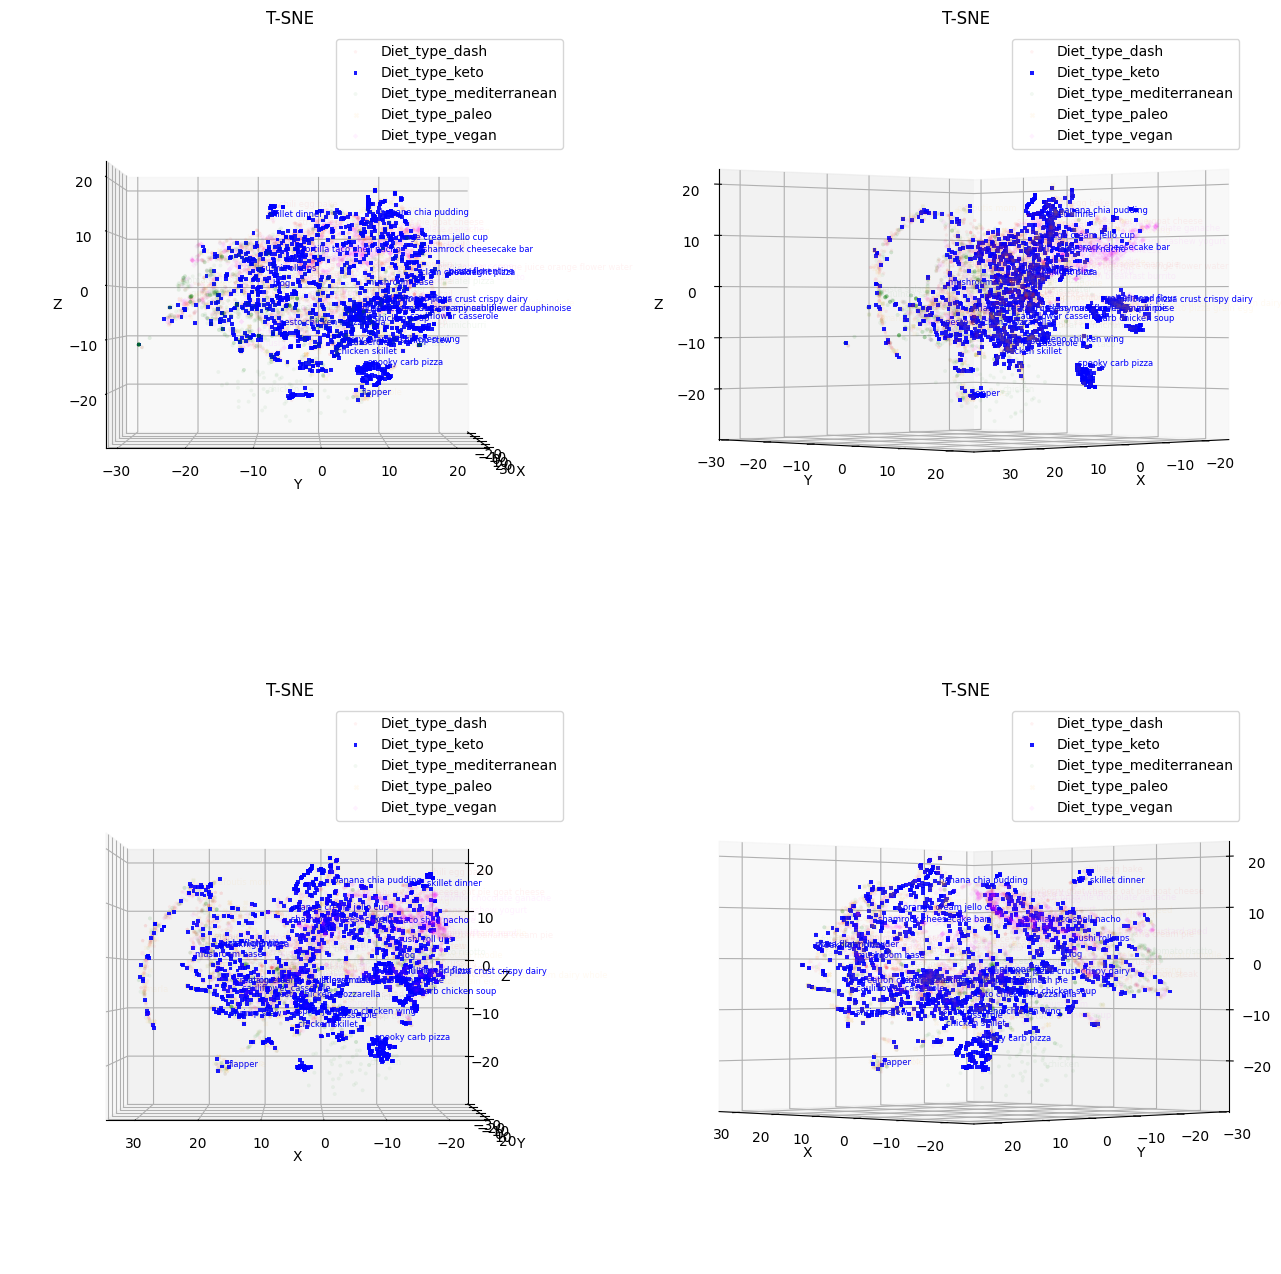

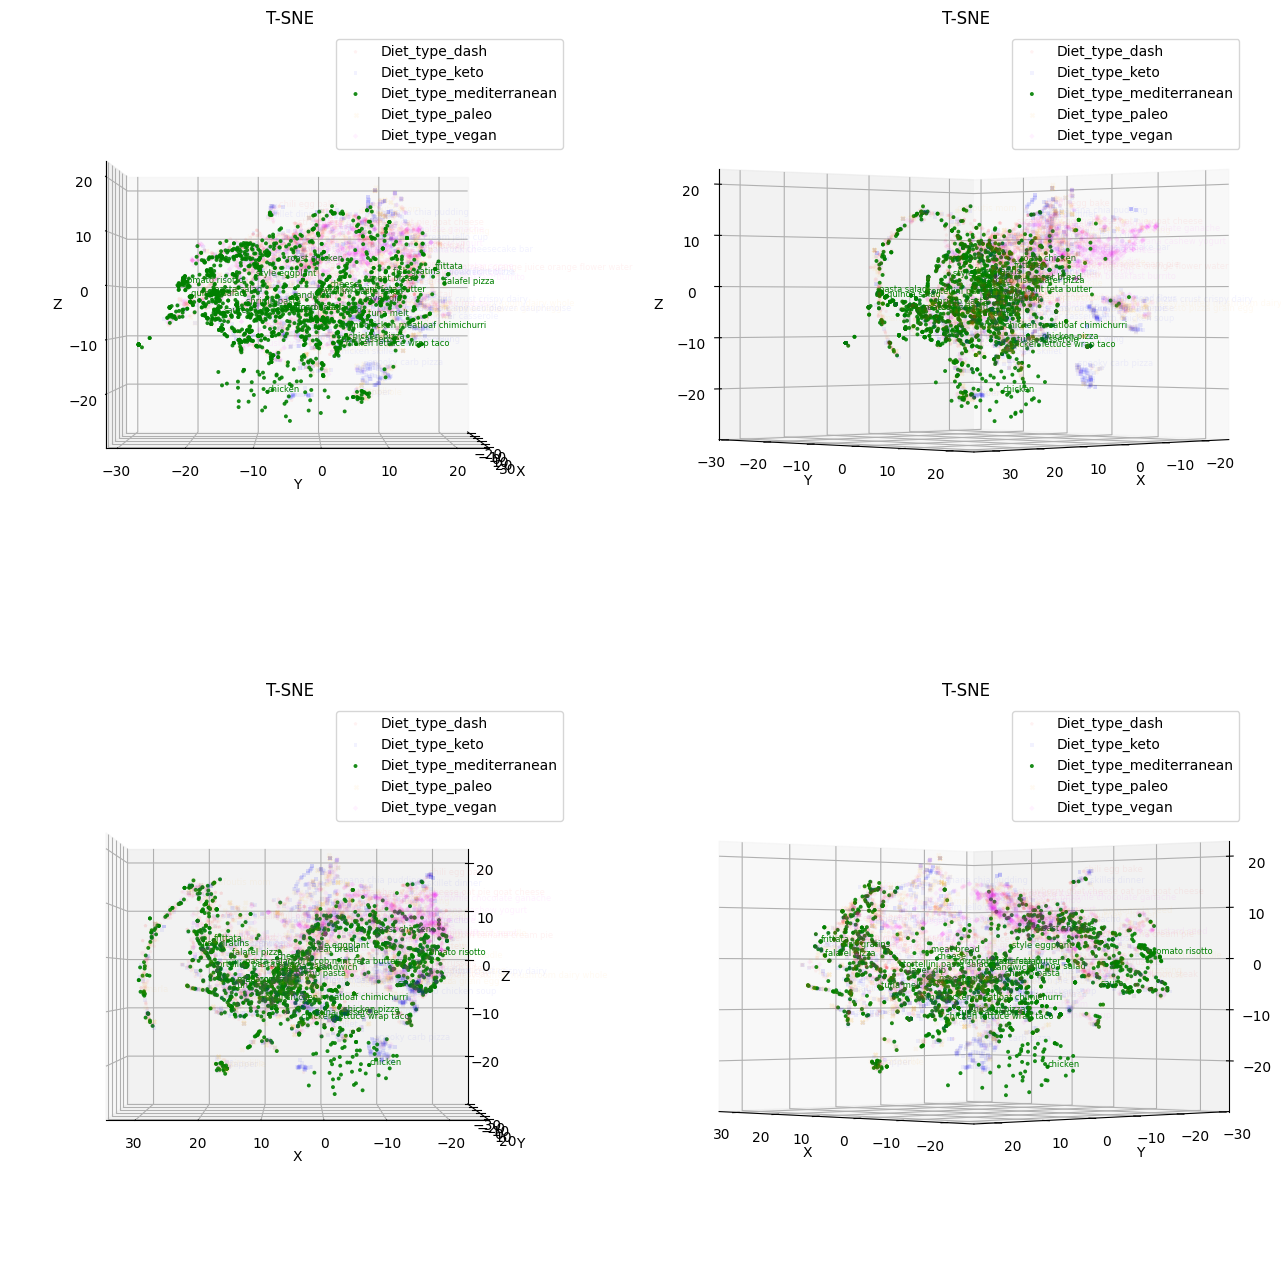

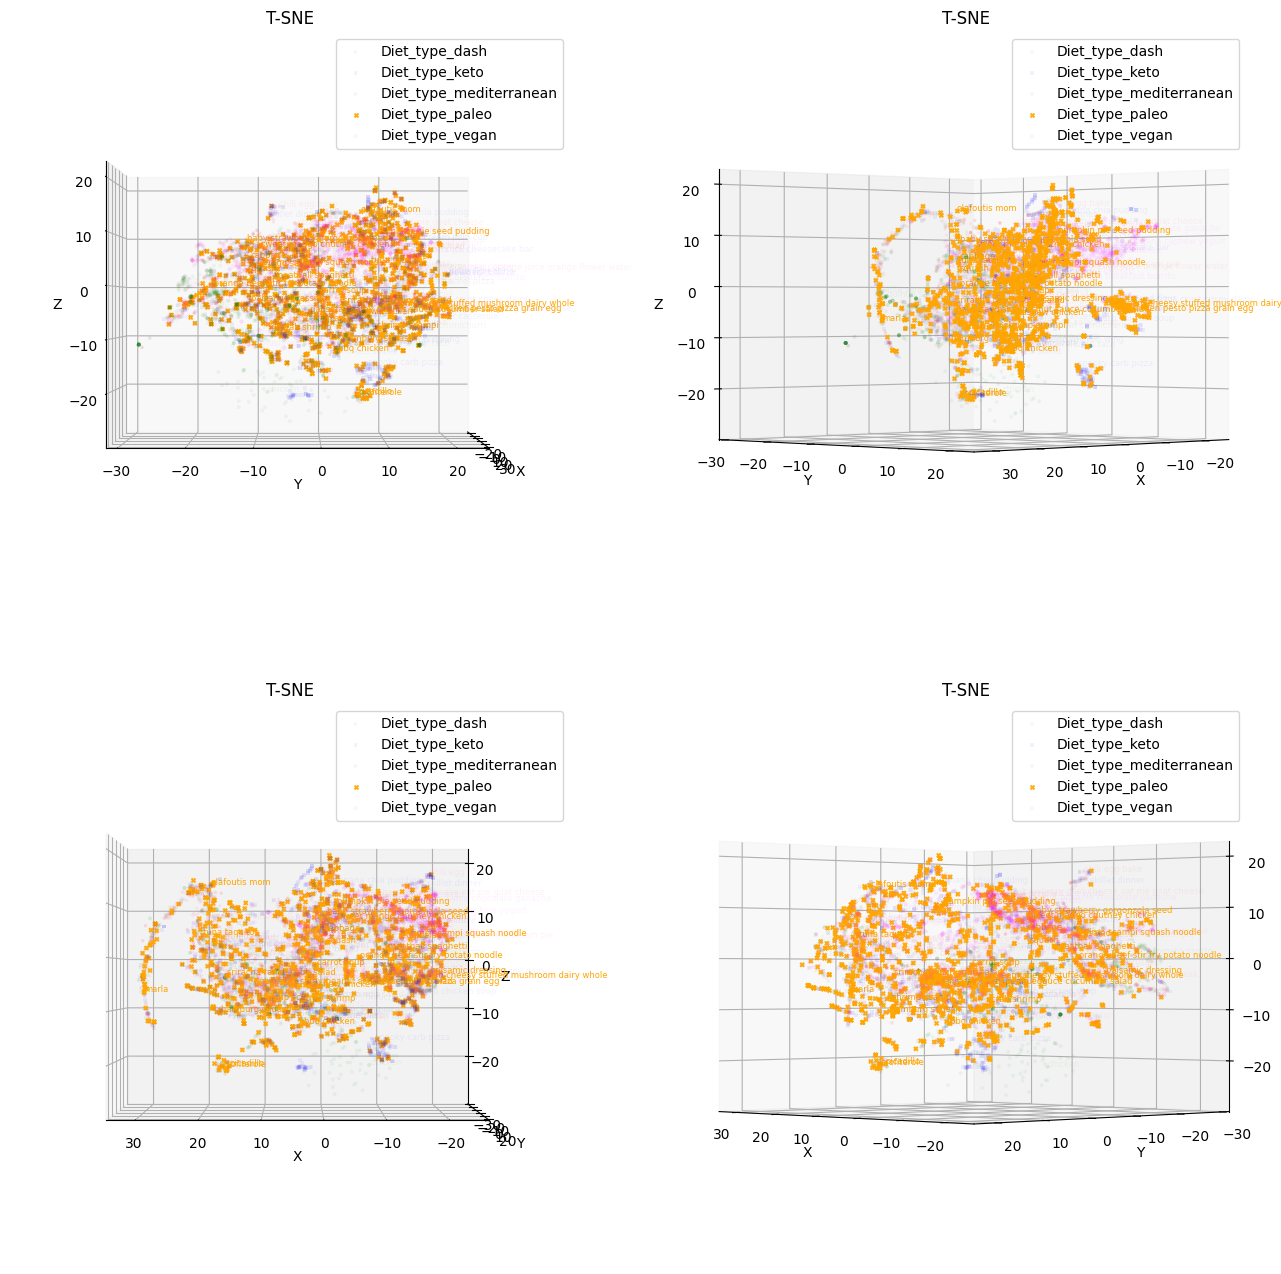

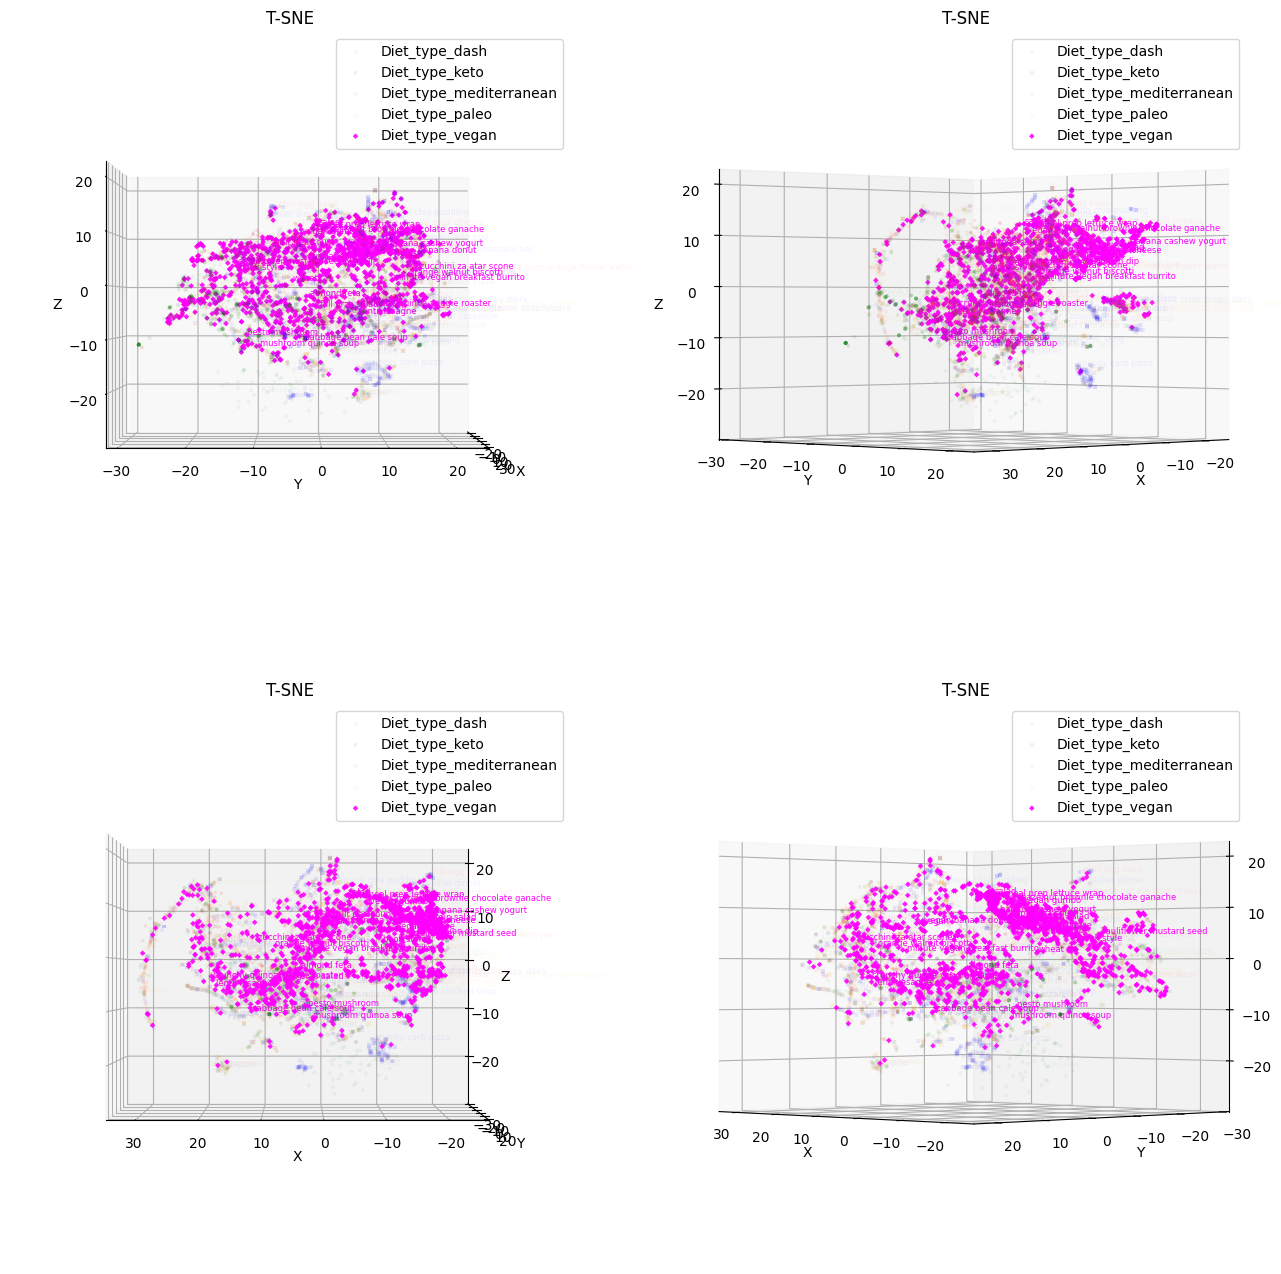

In [13]:

for diet_type in range(len(colors)):
    fig = plt.figure(diet_type,figsize=(16, 16))
    for plot in range(4):
        ax = fig.add_subplot(221+plot, projection='3d')

        # Iterar sobre cada clase y graficar puntos con su color correspondiente
        for i in range(len(colors)):
            class_indices = np.where(color_indices == i)[0]
            ax.scatter(X_embedded[class_indices, 0], X_embedded[class_indices, 1], X_embedded[class_indices, 2],
                    c=colors[i], label=column_names[i], marker=markers[i], edgecolor='none', s=8,alpha = 0.9 if i ==diet_type else 0.05)

        # Seleccionar 50 elementos por clase para etiquetar
        for i in range(len(colors)):
            for idx in selected_indices[i]:
                ax.text(X_embedded[idx, 0], X_embedded[idx, 1], X_embedded[idx, 2], ' '.join(all_nouns[idx]), size=6, zorder=1, color=colors[i],alpha = 1 if i ==diet_type else 0.05)

        ax.set_title('T-SNE')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.view_init(elev=0, azim=angles[plot])

        ax.legend()
    plt.show()

In [14]:
vector_to_name_dict = {}
for i,vector in enumerate(embeddings_features):
    vector_to_name_dict[np.array2string(vector,max_line_width=150)] =recipes.iloc[i]

In [15]:
with open("vector_to_idx.json","w") as file:
    file.write(json.dumps(vector_to_name_dict,indent=1))

In [25]:
proteins = df["Protein(g)"]
carbs = df["Carbs(g)"]
fats = df["Fat(g)"]
information_dict = {}
for i,recipe_name in enumerate(recipes):
    information_dict[recipe_name] = {
        "protein":proteins.iloc[i],
        "carbs":carbs.iloc[i],
        "fats":fats.iloc[i]
    }

In [26]:
with open("recipes_data.json","w") as file:
    file.write(json.dumps(information_dict,indent=1))

In [27]:
print(len(vector_to_name_dict))
len(information_dict)

6570


6573